## Studi kasus Regresi Linear Sederhana

## Load Data

In [ ]:
import pandas as pd

## buat data frame

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 3/Data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,   # in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237   # lb -> kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


Pembagian Data, 80% data training dan 20% data testing

In [ ]:
from sklearn.model_selection import train_test_split

# Variable independent/bebas/fitur : tinggi badan
X = df1[["tinggi_cm"]]
# Variable dependen/terikat/target : berat badan
y = df1[["berat_kg"]]

x_train, x_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=7
)

print('Jumlah data training',+ len(x_train))
print('Jumlah data testing',+ len(x_test))

Jumlah data training 20000
Jumlah data testing 5000


Pemodelan : Training dan Testing Data

In [ ]:
from sklearn.linear_model import LinearRegression

## buat objek instan dari class LinearRegression bernama model
model = LinearRegression()

## Jalankan Training
model.fit(x_train, y_train)

LinearRegression()

Evaluasi Model

In [ ]:

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("koefisien (kg per cm): ", model.coef_[0])
print("intersep (kg):         ", model.intercept_)
print("R2 (test):             ", r2)
print("MAE (kg):              ", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):             ", rmse)

koefisien (kg per cm):  [0.55182326]
intersep (kg):          [-37.65708878]
R2 (test):              0.24989263013277574
MAE (kg):               3.6704107898943548
RMSE (kg):              4.609006140308042


In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"persamaan : y = {slope:.3f}* x + {intercept:.3f} ")

persamaan : y = 0.552* x + -37.657 


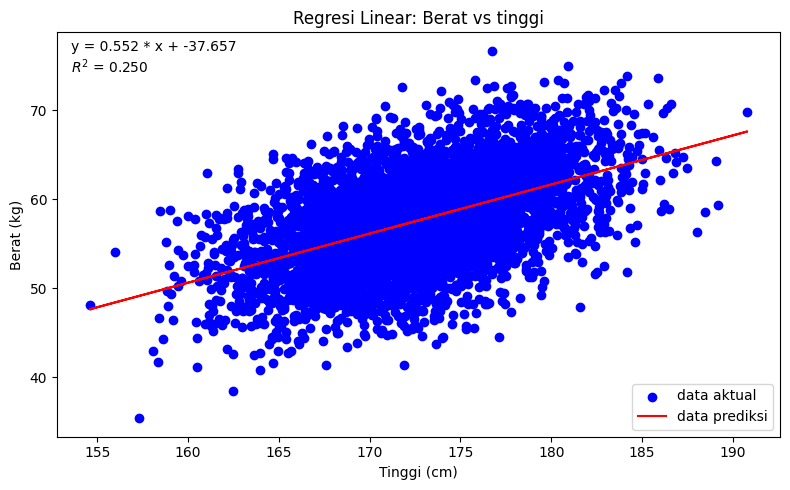

In [ ]:
import matplotlib.pyplot as plt

# plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='data aktual')
# garis regresi
plt.plot(x_test, y_pred, color='red', label='data prediksi')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.title('Regresi Linear: Berat vs tinggi')
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred_test = model.predict(x_test)

# Pastikan semua array 1D
tinggi = x_test["tinggi_cm"].to_numpy().reshape(-1)
berat_aktual = y_test.to_numpy().reshape(-1)
berat_prediksi = y_pred_test.reshape(-1)

# Buat DataFrame hasil
hasil = pd.DataFrame({
    "Tinggi (cm)": tinggi,
    "Berat aktual (kg)": berat_aktual,
    "Berat Prediksi (kg)": berat_prediksi
})

# Hitung selisih error
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

hasil.head()

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg)
0,174.73,50.16,58.762990,8.602990
1,171.31,50.33,56.875754,6.545754
2,169.29,58.22,55.761071,-2.458929
3,163.30,58.92,52.455650,-6.464350
4,170.52,63.06,56.439814,-6.620186
